In [1]:
from tensorflow import keras
from tf_keras_vis.activation_maximization import ActivationMaximization
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
model =  keras.models.load_model('/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2-files/')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 32)      100384    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 32)        50208     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)        5

In [8]:
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress

max_filters = 20

layer_names = ["conv2d","conv2d_2", "conv2d_4"]
activations = {}
for layer_name in layer_names:
    n_filters = model.get_layer(layer_name).filters

    if (n_filters > 20):
        n_filters = 20

    extract_intermediate_layer = ExtractIntermediateLayer(index_or_name=layer_name)
    replace2linear = ReplaceToLinear()
    activation_maximization = ActivationMaximization(model,model_modifier=[extract_intermediate_layer, replace2linear],clone=True)
    
    seed_input_shape  = (n_filters, model.input_shape[1], model.input_shape[2],model.input_shape[3])
    seed_input = tf.random.uniform(seed_input_shape, 0, 255)
    scores = CategoricalScore(list(range(n_filters)))
    activations[layer_name] = activation_maximization(scores,steps = 400 ,seed_input = seed_input, callbacks=[Progress()])


400/400 [==============================] - 1397s 3s/step - Score: 61093.8320 - TotalVariation2D: 16.2773 - Norm: 31.1751


In [ ]:
from numpy import savez_compressed
path = "/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/activation_files/"
for layer_name in layer_names:
    savez_compressed(path + "activations_" + layer_name +'.npz', activations[layer_name])

In [ ]:
from numpy import load
activations = {}
path = "/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/activation_files/"
layer_names = ["conv2d_9","conv2d_10","conv2d_11"]
for layer_name in layer_names:
    activations[layer_name] = load(path + "activations_" + layer_name +'.npz')


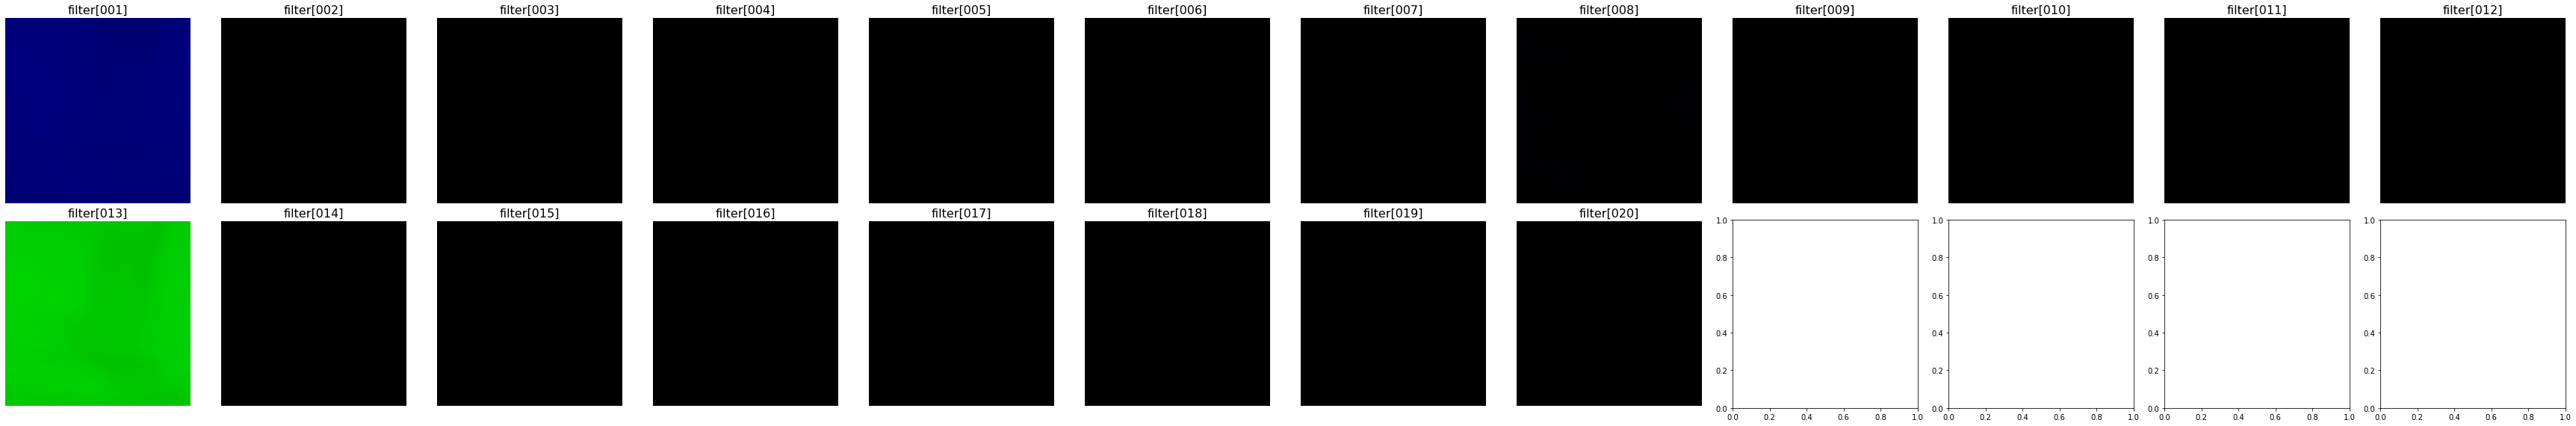

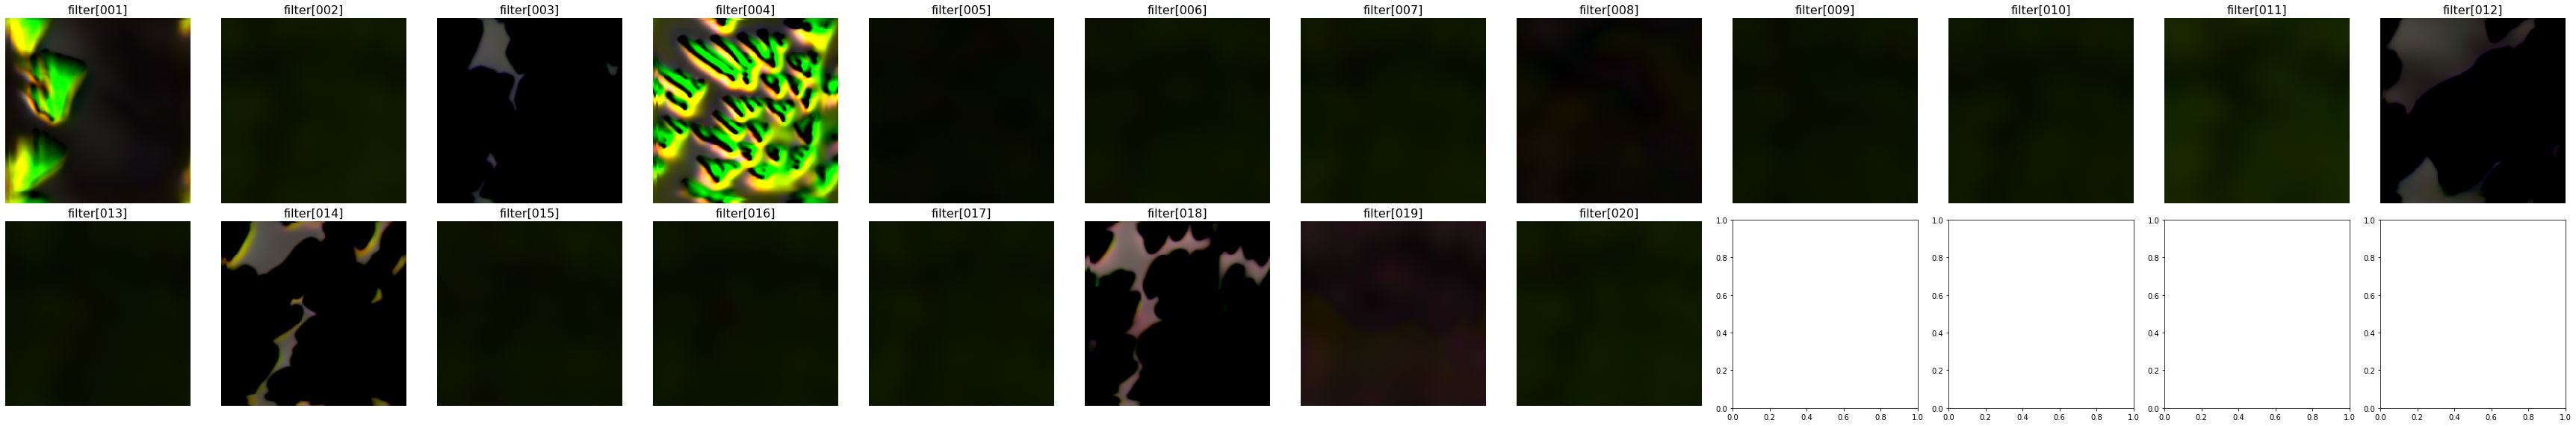

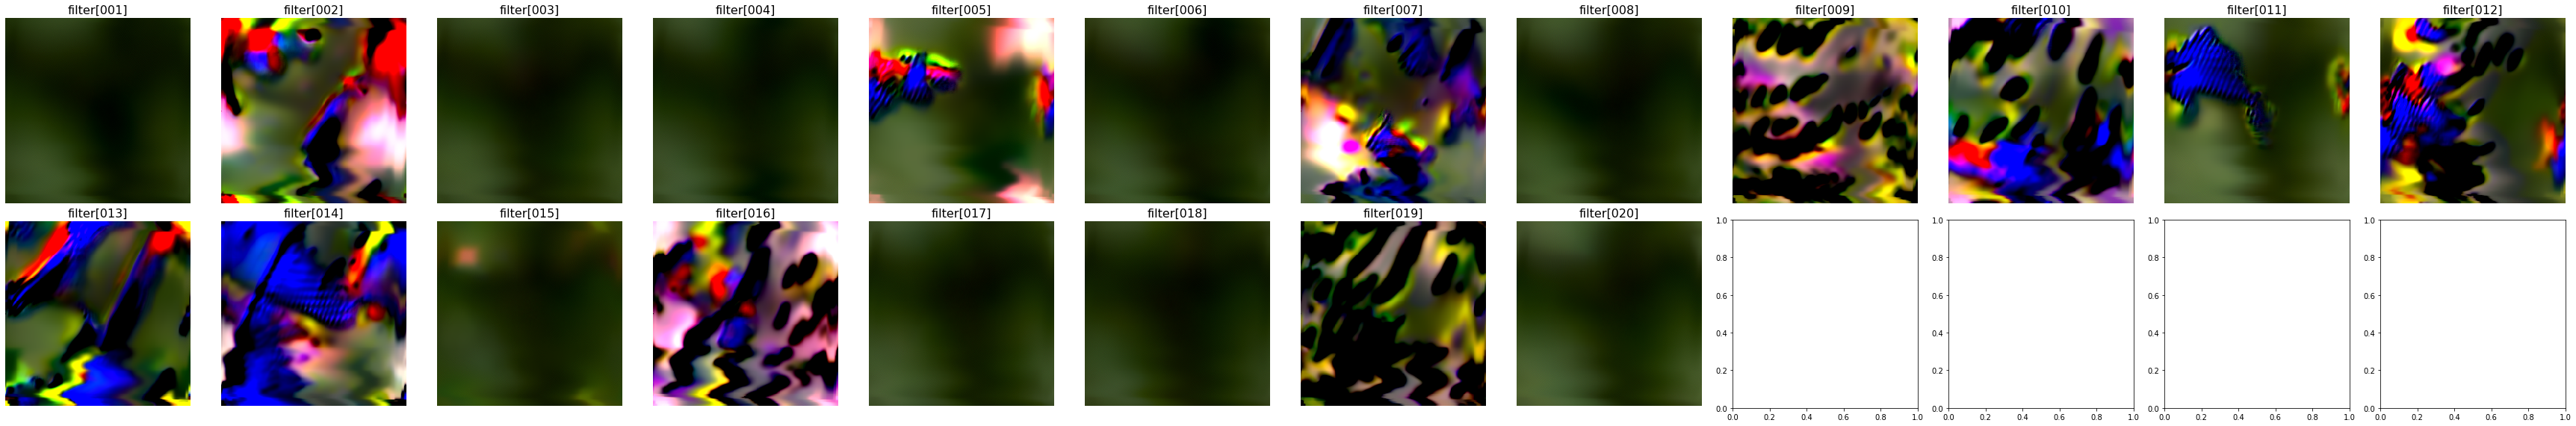

In [11]:
for layer_name in layer_names:
    n_filters = min(model.get_layer(layer_name).filters, 20)
    filters_per_line = 12
    nrows = n_filters//filters_per_line + 1
    ncols = filters_per_line 

    f, ax = plt.subplots(nrows= nrows, ncols = ncols , figsize=(4*ncols, 4*nrows))
    filter_number = 1
    for x in range(nrows):
        if (x == nrows - 1):
            a = n_filters%filters_per_line
        else:
            a = filters_per_line
        for y in range(a): 
            ax[x][y].set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
            ax[x][y].imshow(activations[layer_name][filter_number-1])
            ax[x][y].axis('off')

            filter_number = filter_number + 1

    plt.tight_layout()
    plt.show()